In [2]:
import matplotlib as plt
import numpy as np
import os

# Qiskit
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.visualization import plot_histogram
from dotenv import load_dotenv
from qiskit_aer import AerSimulator


load_dotenv()

lights = [0, 1, 1, 1, 0, 0, 1, 1, 1]

In [3]:
def ans_func(lights):
    adj = [
        [0, 1, 3],
        [0, 1, 2, 4],
        [1, 2, 5],
        [0, 3, 4, 6],
        [1, 3, 4, 5, 7],
        [2, 4, 5, 8],
        [3, 6, 7],
        [4, 6, 7, 8],
        [5, 7, 8],
    ]

    board = QuantumRegister(9)

    soln = QuantumRegister(9)
    oracle = QuantumRegister(1)
    auxiliary = QuantumRegister(7)
    cr = ClassicalRegister(9)

    qc = QuantumCircuit(board, soln, oracle, auxiliary, cr)
    qc.h(soln[:])
    qc.x(oracle[0])
    qc.h(oracle[0])

    for i in range(9):
        if lights[i] == 1:
            qc.x(board[i])

    for k in range(1):
        for i in range(9):
            for j in adj[i]:
                qc.cx(soln[i], board[j])
            qc.x(board[i])
        print(qc.draw())

        qc.mcx(board[:], oracle[0], auxiliary[:], mode="basic")

        for i in range(9):
            qc.x(board[i])
            for j in adj[i]:
                qc.cx(soln[i], board[j])
        print(qc.draw())

        qc.h(soln[:])
        qc.x(soln[:])
        qc.h(soln[8])
        qc.mcx(soln[0:8], soln[8], auxiliary[:], mode="basic")
        qc.h(soln[8])
        qc.x(soln[:])
        qc.h(soln[:])
        print(qc.draw())

    qc.h(oracle[0])
    qc.x(oracle[0])
    qc.measure(soln, cr)
    qc = qc.reverse_bits()
    return qc


ans_circuit = ans_func(lights)

           ┌───┐┌───┐     ┌───┐     ┌───┐                                   »
q1_0: ─────┤ X ├┤ X ├─────┤ X ├─────┤ X ├───────────────────────────────────»
      ┌───┐└─┬─┘├───┤     └─┬─┘┌───┐└─┬─┘┌───┐          ┌───┐          ┌───┐»
q1_1: ┤ X ├──┼──┤ X ├───────┼──┤ X ├──┼──┤ X ├──────────┤ X ├──────────┤ X ├»
      ├───┤  │  └─┬─┘       │  └─┬─┘  │  ├───┤          └─┬─┘┌───┐┌───┐└─┬─┘»
q1_2: ┤ X ├──┼────┼─────────┼────┼────┼──┤ X ├────────────┼──┤ X ├┤ X ├──┼──»
      ├───┤  │    │  ┌───┐  │    │    │  └─┬─┘┌───┐┌───┐  │  └─┬─┘└───┘  │  »
q1_3: ┤ X ├──┼────┼──┤ X ├──┼────┼────┼────┼──┤ X ├┤ X ├──┼────┼─────────┼──»
      └───┘  │    │  └─┬─┘  │    │    │    │  └─┬─┘├───┤  │    │  ┌───┐  │  »
q1_4: ───────┼────┼────┼────┼────┼────┼────┼────┼──┤ X ├──┼────┼──┤ X ├──┼──»
             │    │    │    │    │    │    │    │  └─┬─┘  │    │  └─┬─┘  │  »
q1_5: ───────┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────┼────┼──»
      ┌───┐  │    │    │    │    │    │    │    │    │    │    │

{'100101010': 4, '001110100': 4, '010010010': 12, '101001000': 13, '000111101': 5, '111000101': 9, '011100010': 8, '101011110': 11, '001111011': 5, '010111001': 7, '111101110': 12, '000110000': 7, '011000110': 9, '001111111': 5, '001101111': 3, '010011001': 11, '100100010': 13, '010100111': 6, '101110111': 8, '001100011': 15, '011111011': 8, '111010110': 7, '010011110': 11, '000111011': 7, '000010011': 3, '011100011': 7, '100010101': 7, '001110110': 9, '001110001': 6, '110011000': 7, '000001100': 9, '100100110': 6, '111010010': 10, '001111000': 13, '100000110': 12, '001110000': 12, '111001000': 7, '001000011': 13, '000101010': 11, '101110110': 9, '100000101': 8, '000111010': 8, '001110011': 13, '000011001': 11, '001000000': 10, '110010110': 12, '100100111': 10, '101010111': 9, '000000011': 10, '000111000': 12, '110011111': 8, '010000110': 12, '001000010': 7, '100100000': 8, '001101011': 10, '111011100': 5, '110110111': 9, '101100011': 5, '000001111': 7, '111011011': 10, '111000100': 7,

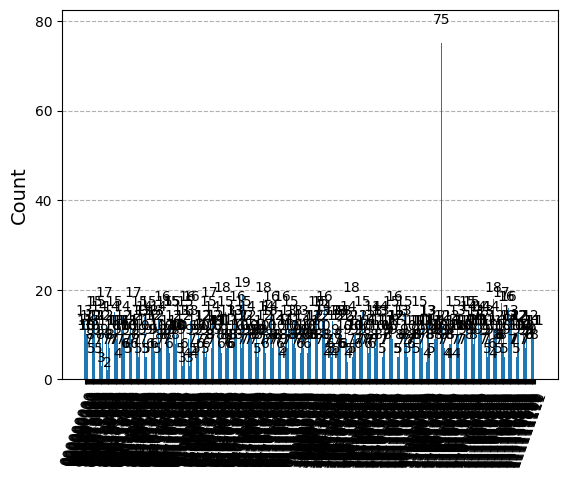

In [9]:
backend = AerSimulator()
transpiled_qc = transpile(ans_circuit, backend=backend)
result = backend.run(transpiled_qc, shots=5000).result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)